In [19]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [20]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

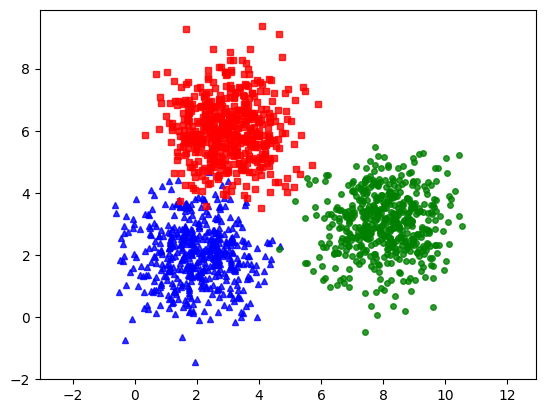

In [21]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [22]:
# Khởi tạo các centers ban đầu
def kmeans_init_centers(X,k):
    # Chọn ngẫu nhiên K hàng X làm tâm ban đầu
    return X[np.random.choice(X.shape[0], k , replace = False)]


In [28]:
# Gán nhãn mới cho các điểm khi biết centers
def kmeans_assign_labels(X, centers):
    # Tính toán khoảng cách theo cặp dữ liệu và trung tâm
    D = cdist(X, centers)
    # Trả về chỉ số của trung tâm gần nhất
    return np.argmin(D, axis = 1)


In [29]:
# Cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    
    for k in range(K):
        # Thu nhập tất cả các điểm được gán cho cụm thứ k
        Xk = X[labels == k, :]
        # Lấy trung bình
        centers[k, :] = np.mean(Xk, axis = 0)
    return centers

In [33]:
# Kiểm tra điều kiện dừng thuật toán
def has_coverged(centers, new_centers):
    # Trả về True nếu 2 bộ trung tâm giống nhau
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers] ))

In [64]:
# Main
def kmeans(X, k):
    centers = [kmeans_init_centers(X, k)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_coverged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
        return (centers, labels, it)

Centers found by our algorithm:
[[8.04293374 3.02798709]
 [2.90770461 5.75113837]
 [1.93817425 1.79038413]]


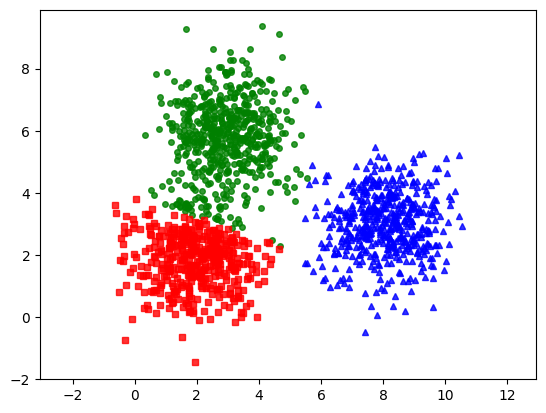

In [66]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

# 

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


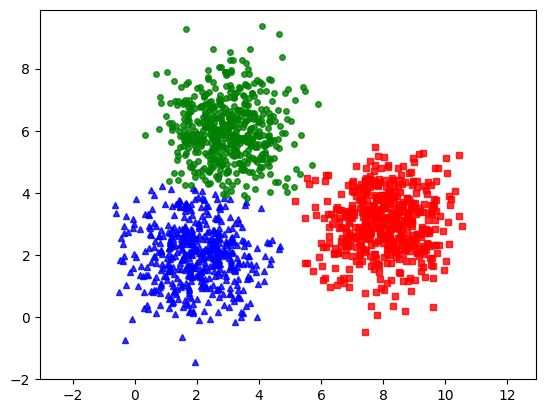

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)